# Tutorial for apply NMFproj to the cNMF output.

Preprocessing steps are based on [https://github.com/dylkot/cNMF/blob/master/Tutorials/analyze_pbmc_example_data.ipynb](https://github.com/dylkot/cNMF/blob/master/Tutorials/analyze_pbmc_example_data.ipynb) and [https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).

## define consensus GEPs using cNMF

In [2]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
from scipy.io import mmread
import scipy.sparse as sp
import matplotlib.pyplot as plt
from IPython.display import Image
import scanpy as sc
from cnmf import cNMF

if not os.path.exists('PBMC'):
    os.mkdir('PBMC')
    
np.random.seed(14)

# Install NMFproj
! pip install git+https://github.com/yyoshiaki/NMFprojection.git

In [3]:
from NMFproj import *

### prepare reference

In [4]:
adata = sc.datasets.pbmc3k()

sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [5]:
count_adat_fn = 'PBMC/counts.h5ad'
sc.write(count_adat_fn, adata)

/home/yyasumizu/anaconda3/envs/scanpy1.9.1/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[Worker 0]. Starting task 0.
[Worker 0]. Starting task 1.
[Worker 0]. Starting task 2.
[Worker 0]. Starting task 3.
[Worker 0]. Starting task 4.
[Worker 0]. Starting task 5.
[Worker 0]. Starting task 6.
[Worker 0]. Starting task 7.
[Worker 0]. Starting task 8.
[Worker 0]. Starting task 9.
[Worker 0]. Starting task 10.
[Worker 0]. Starting task 11.
[Worker 0]. Starting task 12.
[Worker 0]. Starting task 13.
[Worker 0]. Starting task 14.
[Worker 0]. Starting task 15.
[Worker 0]. Starting task 16.
[Worker 0]. Starting task 17.
[Worker 0]. Starting task 18.
[Worker 0]. Starting task 19.
[Worker 0]. Starting task 20.
[Worker 0]. Starting task 21.
[Worker 0]. Starting task 22.
[Worker 0]. Starting task 23.
[Worker 0]. Starting task 24.
[Worker 0]. Starting task 25.
[Worker 0]. Starting task 26.
[Worker 0]. Starting task 27.
[Worker 0]. Starting task 28.
[Worker 0]. Starting task 29.
[Worker 0]. Starting task 30.
[Worker 0]. Starting task 31.
[Worker 0]. Starting task 32.
[Worker 0]. Starting

/home/yyasumizu/anaconda3/envs/scanpy1.9.1/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


[Worker 0]. Starting task 105.
[Worker 0]. Starting task 106.
[Worker 0]. Starting task 107.
[Worker 0]. Starting task 108.
[Worker 0]. Starting task 109.
[Worker 0]. Starting task 110.
[Worker 0]. Starting task 111.
[Worker 0]. Starting task 112.
[Worker 0]. Starting task 113.
[Worker 0]. Starting task 114.
[Worker 0]. Starting task 115.
[Worker 0]. Starting task 116.
[Worker 0]. Starting task 117.
[Worker 0]. Starting task 118.
[Worker 0]. Starting task 119.
Combining factorizations for k=5.
Combining factorizations for k=6.
Combining factorizations for k=7.
Combining factorizations for k=8.
Combining factorizations for k=9.
Combining factorizations for k=10.


/home/yyasumizu/anaconda3/envs/scanpy1.9.1/lib/python3.9/site-packages/cnmf/cnmf.py:772: RuntimeWarning: invalid value encountered in true_divide
  norm_tpm = (np.array(tpm.X.todense()) - tpm_stats['__mean'].values) / tpm_stats['__std'].values
/home/yyasumizu/anaconda3/envs/scanpy1.9.1/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


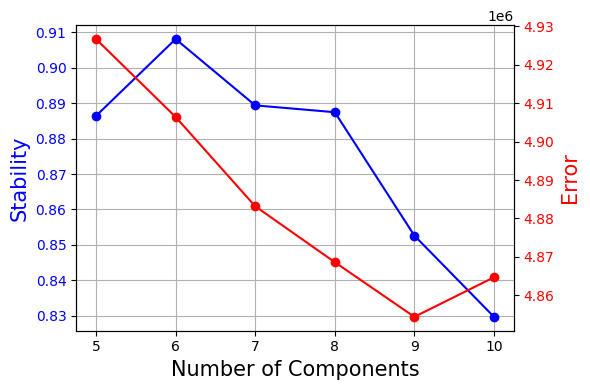

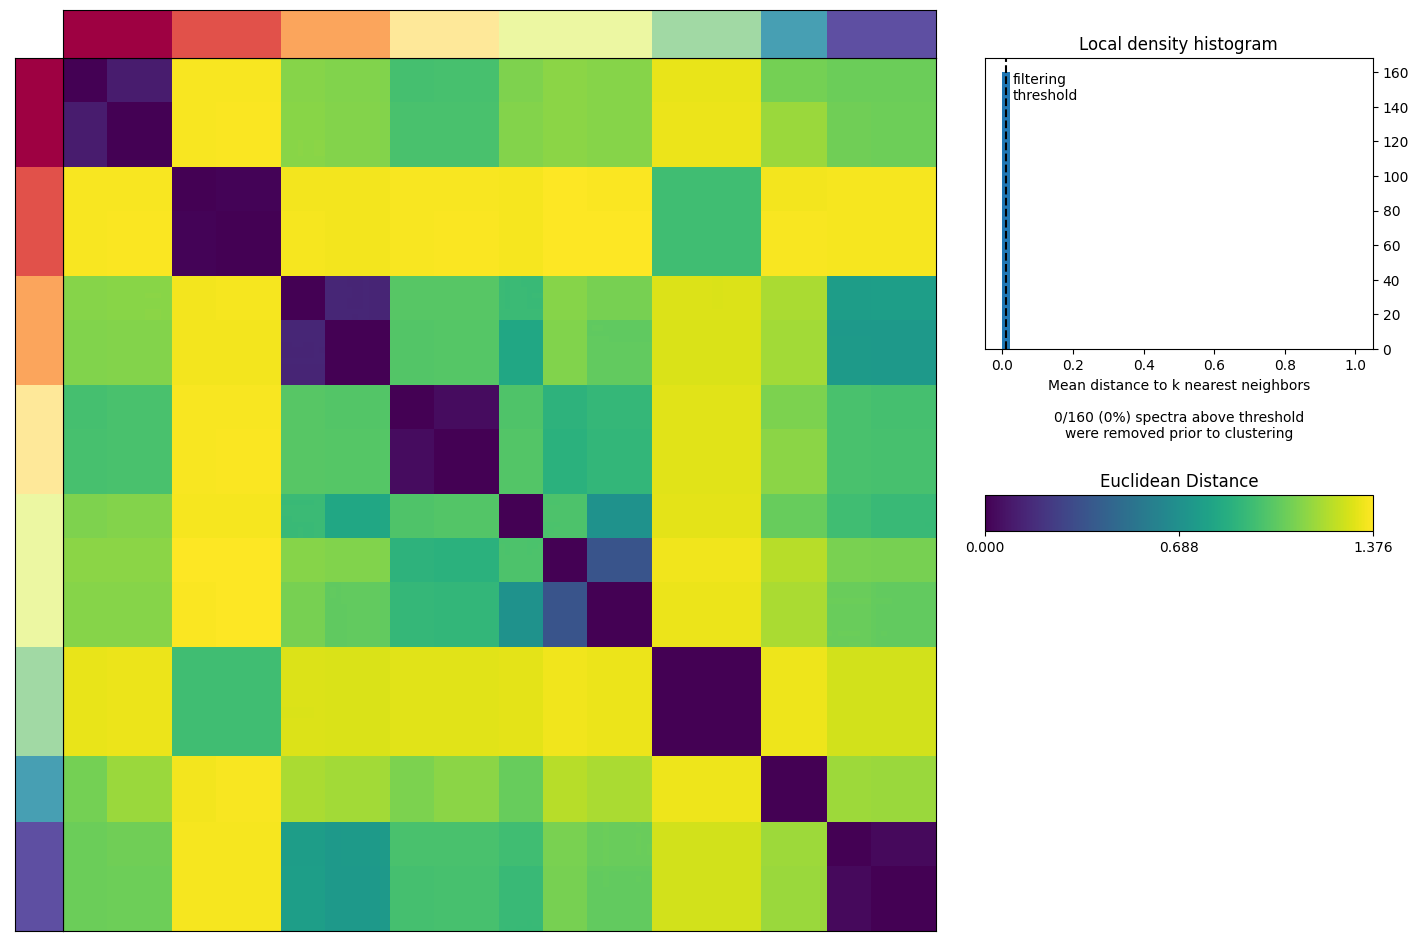

In [6]:
from cnmf import cNMF
cnmf_obj = cNMF(output_dir="./", name="PBMC")
cnmf_obj.prepare(counts_fn=count_adat_fn, components=np.arange(5,11), n_iter=20, seed=14)
cnmf_obj.factorize(worker_i=0, total_workers=1)
cnmf_obj.combine()
cnmf_obj.k_selection_plot()
cnmf_obj.consensus(k=8, density_threshold=0.01)
usage, spectra_scores, spectra_tpm, top_genes = cnmf_obj.load_results(K=8, density_threshold=0.01)


In [7]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
# sc.tl.leiden(adata)

/home/yyasumizu/anaconda3/envs/scanpy1.9.1/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/yyasumizu/anaconda3/envs/scanpy1.9.1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


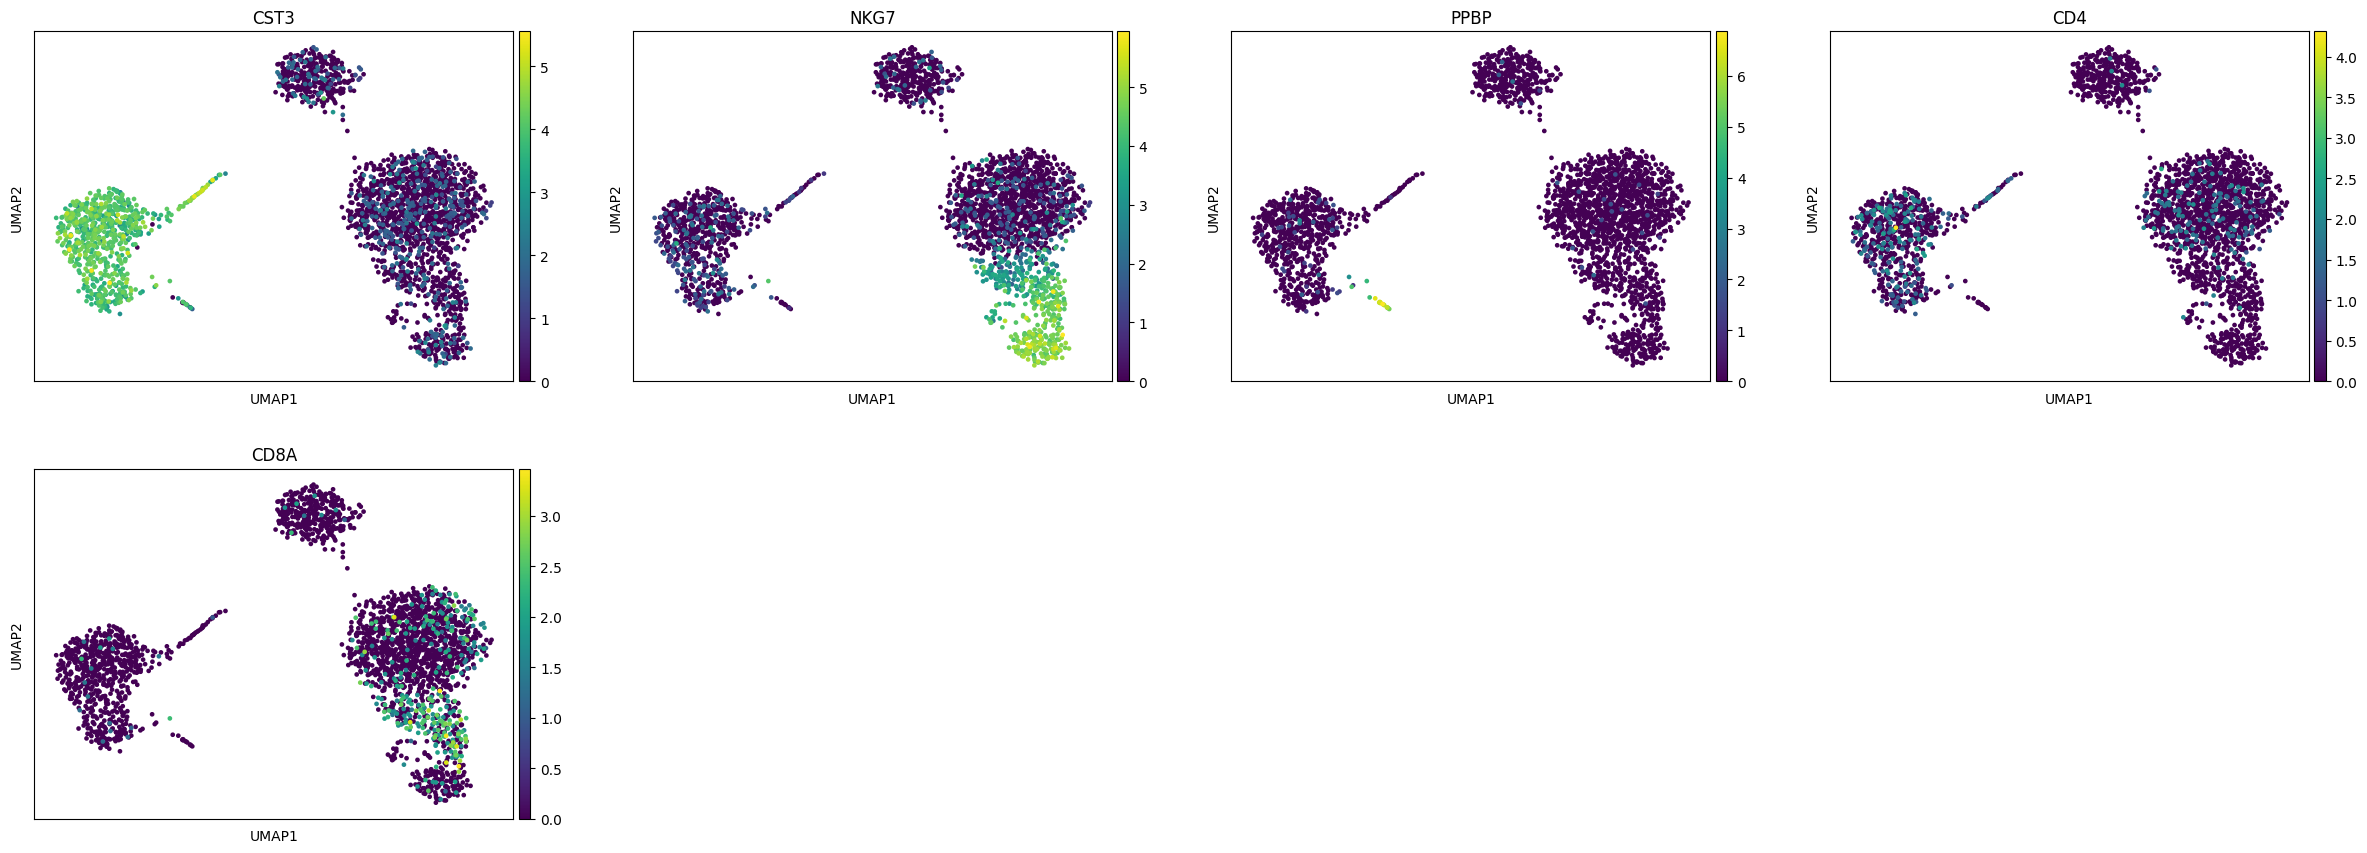

In [8]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP', 'CD4', 'CD8A'])

In [9]:
usage.columns = ['Usage_%d' % i for i in usage.columns]
adata.obs = pd.merge(left=adata.obs, right=usage, how='left', left_index=True, right_index=True)

In [10]:
usage.max()

Usage_1    1.000000
Usage_2    1.000000
Usage_3    1.000000
Usage_4    1.000000
Usage_5    1.000000
Usage_6    1.000000
Usage_7    0.979126
Usage_8    0.826246
dtype: float64

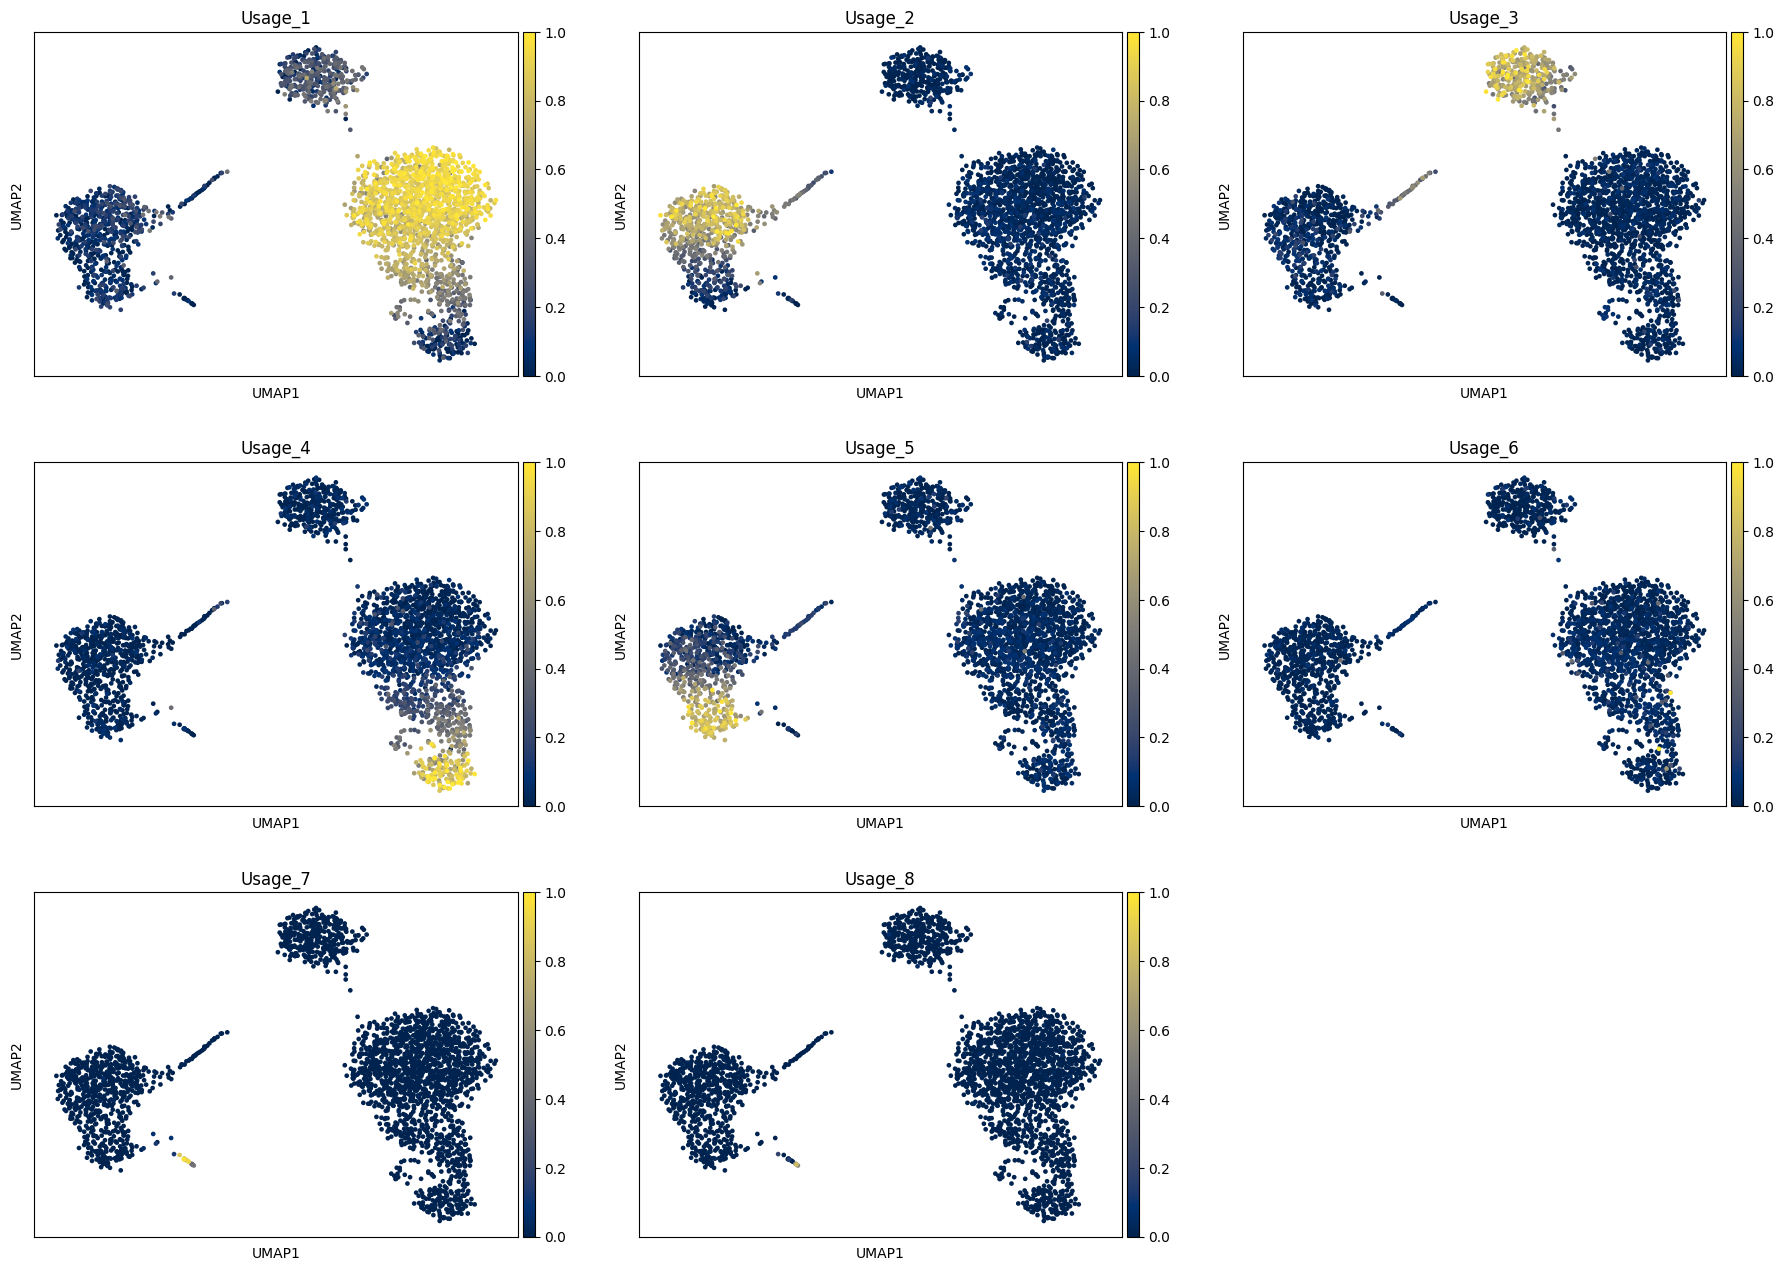

In [11]:
sc.pl.umap(adata, color=usage.columns,
           use_raw=True, ncols=3, vmin=0, vmax=1, cmap='cividis')

## NMFproj

### prepare query dataset

In [12]:
! wget -O PBMC/10k_PBMC_3p_nextgem_Chromium_X_filtered_feature_bc_matrix.h5 \
    https://cf.10xgenomics.com/samples/cell-exp/6.1.0/10k_PBMC_3p_nextgem_Chromium_X/10k_PBMC_3p_nextgem_Chromium_X_filtered_feature_bc_matrix.h5

--2023-08-08 16:53:49--  https://cf.10xgenomics.com/samples/cell-exp/6.1.0/10k_PBMC_3p_nextgem_Chromium_X/10k_PBMC_3p_nextgem_Chromium_X_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39503734 (38M) [binary/octet-stream]
Saving to: ‘PBMC/10k_PBMC_3p_nextgem_Chromium_X_filtered_feature_bc_matrix.h5’

PBMC/10k_PBMC_3p_ne 100%[===================>]  37.67M  90.7MB/s    in 0.4s    

2023-08-08 16:53:50 (90.7 MB/s) - ‘PBMC/10k_PBMC_3p_nextgem_Chromium_X_filtered_feature_bc_matrix.h5’ saved [39503734/39503734]



In [13]:
adata_query = sc.read_10x_h5('./PBMC/10k_PBMC_3p_nextgem_Chromium_X_filtered_feature_bc_matrix.h5')
adata_query.var_names_make_unique()

sc.pp.normalize_total(adata_query, target_sum=1e4)
sc.pp.log1p(adata_query)
sc.pp.highly_variable_genes(adata_query, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata_query.raw = adata_query
adata_query = adata_query[:, adata_query.var.highly_variable]
# sc.pp.regress_out(adata_query, ['total_counts', 'pct_counts_mt'])
# sc.pp.scale(adata_query, max_value=10)
sc.tl.pca(adata_query, svd_solver='arpack')
sc.pp.neighbors(adata_query, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_query)
# sc.tl.leiden(adata)

adata_query

/home/yyasumizu/anaconda3/envs/scanpy1.9.1/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 11996 × 2765
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

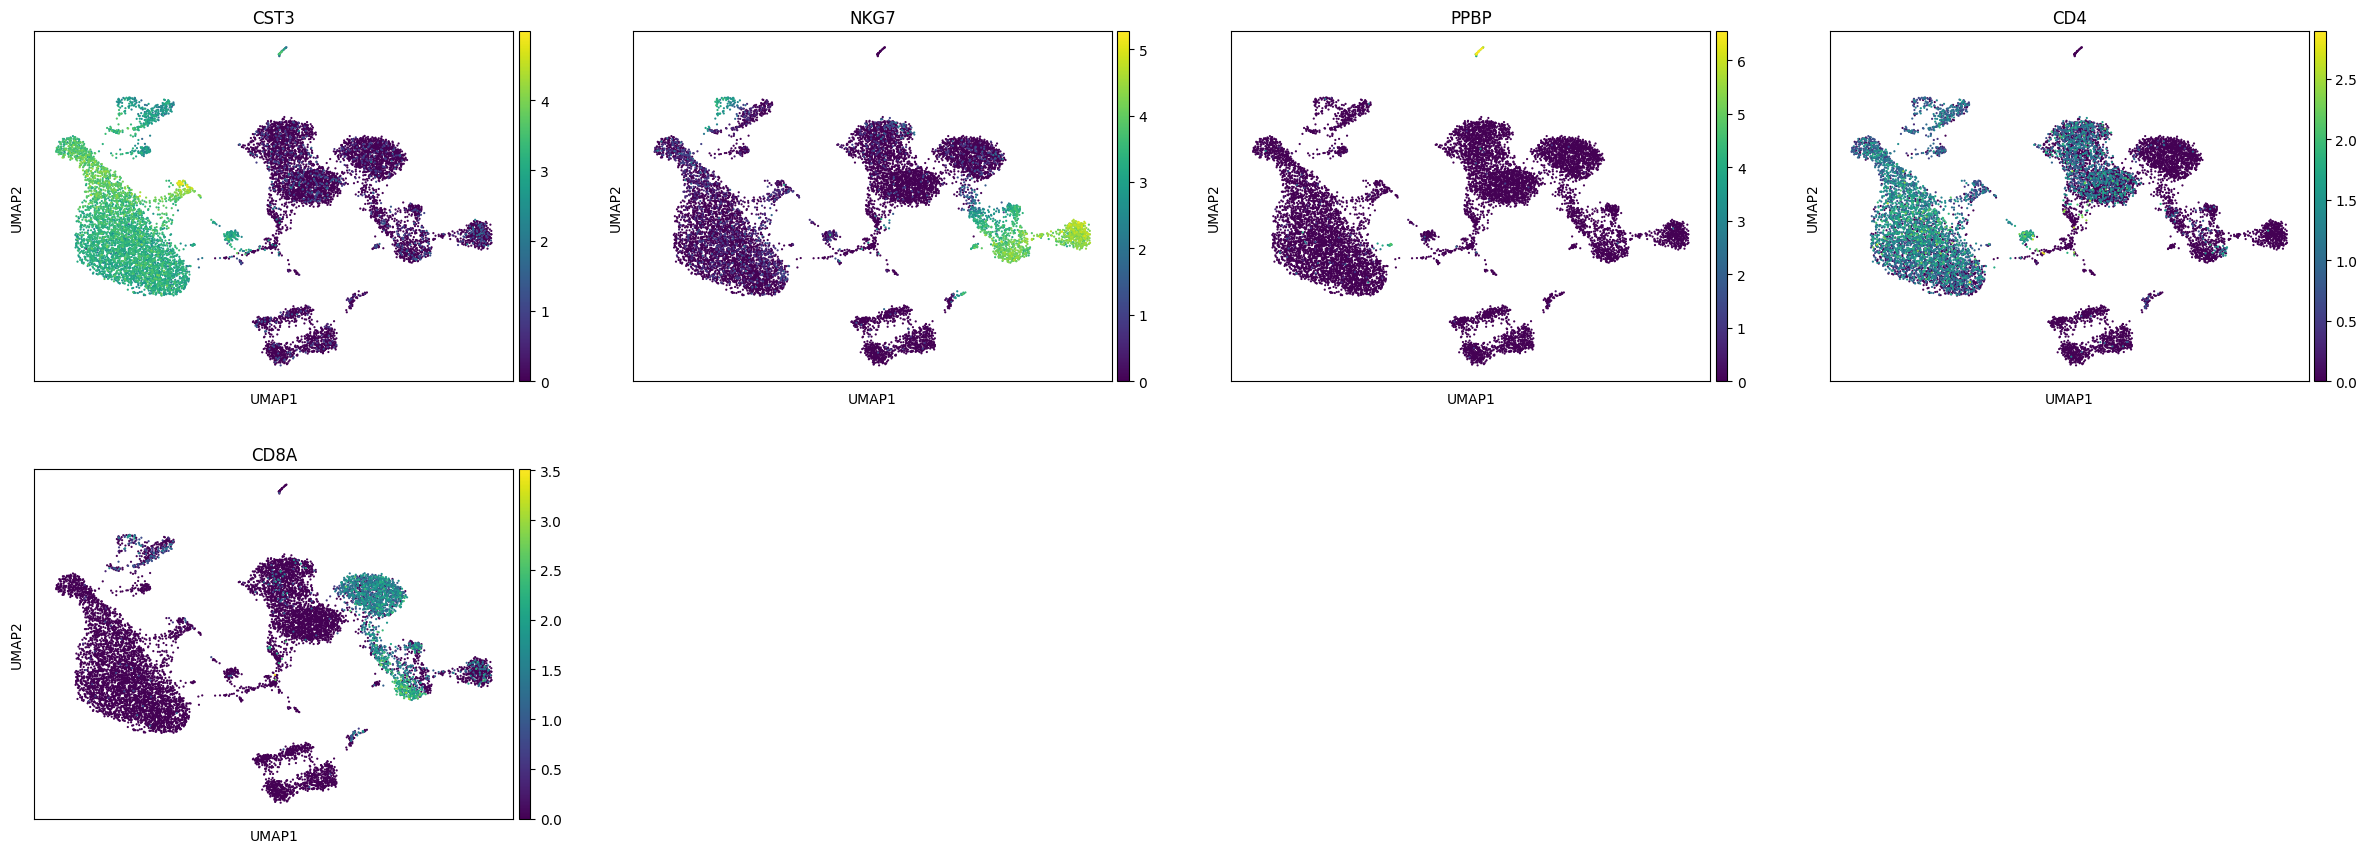

In [14]:
sc.pl.umap(adata_query, color=['CST3', 'NKG7', 'PPBP', 'CD4', 'CD8A'])

## load consensus df in the tmp directory

In [15]:
data = np.load('./PBMC/cnmf_tmp/PBMC.spectra.k_8.dt_0_01.consensus.df.npz', allow_pickle=True)
fixed_W = pd.DataFrame(data['data'], columns=data['columns'], index=data['index']).T
fixed_W.head()

,1,2,3,4,5,6,7,8
ISG15,0.000674,0.002027,0.000535,0.000705,0.002285,0.000959,0.000047,0.000000
CPSF3L,0.000289,0.000141,0.000477,0.000327,0.000116,0.000093,0.000024,0.000008
MRPL20,0.000737,0.000752,0.000741,0.000477,0.000380,0.000181,0.000000,0.000399
ATAD3C,0.000000,0.000000,0.000000,0.001010,0.000000,0.000000,0.000000,0.000000
C1orf86,0.000618,0.001108,0.000499,0.000392,0.000553,0.000000,0.000000,0.000000


## NMFproj


In [16]:
X = adata_query.raw.to_adata().to_df().T

In [17]:
X_norm, X_trunc, df_H, fixed_W_trunc = NMFproj(X, fixed_W, return_truncated=True, normalized=True)
df_ev = calc_EV(X_trunc, fixed_W_trunc, df_H)
df_stats = calc_hvg_overlap(X_norm, fixed_W_trunc, min_mean=0.0125, max_mean=3, min_disp=0.1,
                            n_top_genes=500)
print('\n## Stats of overlap of HVGs')
msg = 'Num. genes in fixed W: %s \n' % fixed_W.shape[0]
msg += 'Num. Retained genes (Prop.): %s (%s)\n' % (fixed_W_trunc.shape[0], fixed_W_trunc.shape[0]/fixed_W.shape[0])
msg += 'Prop. overlap of HVGs (POH) : {} in {} query HVGs'.format(
    df_stats.loc[df_stats['highly_variable'], 'selected'].sum() / df_stats['highly_variable'].sum(), 
    df_stats.highly_variable.sum())
print(msg)

/media/yyasumizu/HDDRAIDp4/home/yyasumizu/bioinformatics/yyoshiaki-git/NMFprojection/NMFproj/NMFproj.py:49: UserWarning: input X looks normalized though normalized flag was not passed
  warnings.warn("input X looks normalized though normalized flag was not passed")



## Stats of overlap of HVGs
Num. genes in fixed W: 2000 
Num. Retained genes (Prop.): 1835 (0.9175)
Prop. overlap of HVGs (POH) : 0.296 in 500 query HVGs


### Alternatievly, NMFproj CLI

In [18]:
X.head()

,AAACCCAAGGCCCAAA-1,AAACCCAAGTAATACG-1,AAACCCAAGTCACACT-1,AAACCCACAAAGCGTG-1,AAACCCACAATCGAAA-1,AAACCCACAGATCACT-1,AAACCCACATTGACCA-1,AAACCCAGTGAGCCAA-1,AAACCCAGTGATAGAT-1,AAACCCAGTGCCTGAC-1,...,TTTGTTGCATCACGGC-1,TTTGTTGCATCCAACA-1,TTTGTTGGTAAGGTCG-1,TTTGTTGGTACAGAGC-1,TTTGTTGGTCGCAACC-1,TTTGTTGGTTGGATCT-1,TTTGTTGGTTTCTTAC-1,TTTGTTGTCCATTTCA-1,TTTGTTGTCTACACAG-1,TTTGTTGTCTCATTAC-1
MIR1302-2HG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# save expression matrix
X.to_csv('./PBMC/query.X.csv')

In [20]:
! NMFproj ./PBMC/query.X.csv \
    ./PBMC/cnmf_tmp/PBMC.spectra.k_8.dt_0_01.consensus.df.npz \
    --outputprefix ./PBMC/query_NMFproj \
    --normalized \
    --scale_output

/media/yyasumizu/HDDRAIDp4/home/yyasumizu/bioinformatics/yyoshiaki-git/NMFprojection/NMFproj/NMFproj.py:49: UserWarning: input X looks normalized though normalized flag was not passed
  warnings.warn("input X looks normalized though normalized flag was not passed")
## Stats of RSME
              Error
count  11996.000000
mean       0.519776
std        0.053797
min        0.340521
25%        0.481565
50%        0.513388
75%        0.552071
max        0.760718
## Stats of Explained Variance
     ExplainedVariance
1             0.340247
2             0.219976
3             0.070225
4             0.038542
5             0.213680
6             0.009609
7             0.000673
8             0.000621
ALL           0.617926

## Stats of overlap of HVGs
Num. genes in fixed W: 2000 
Num. Retained genes (Prop.): 1835 (0.9175)
Prop. overlap of HVGs (POH) : 0.296 in 500 query HVGs


In [21]:
df_H_norm = (df_H.T / df_H.max(axis=1))
df_H_norm.columns = [f'NMFproj_{c}' for c in df_H_norm.columns]
adata_query.obs = pd.merge(adata_query.obs, df_H_norm, left_index=True, right_index=True)

In [22]:
adata_query

AnnData object with n_obs × n_vars = 11996 × 2765
    obs: 'NMFproj_1', 'NMFproj_2', 'NMFproj_3', 'NMFproj_4', 'NMFproj_5', 'NMFproj_6', 'NMFproj_7', 'NMFproj_8'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

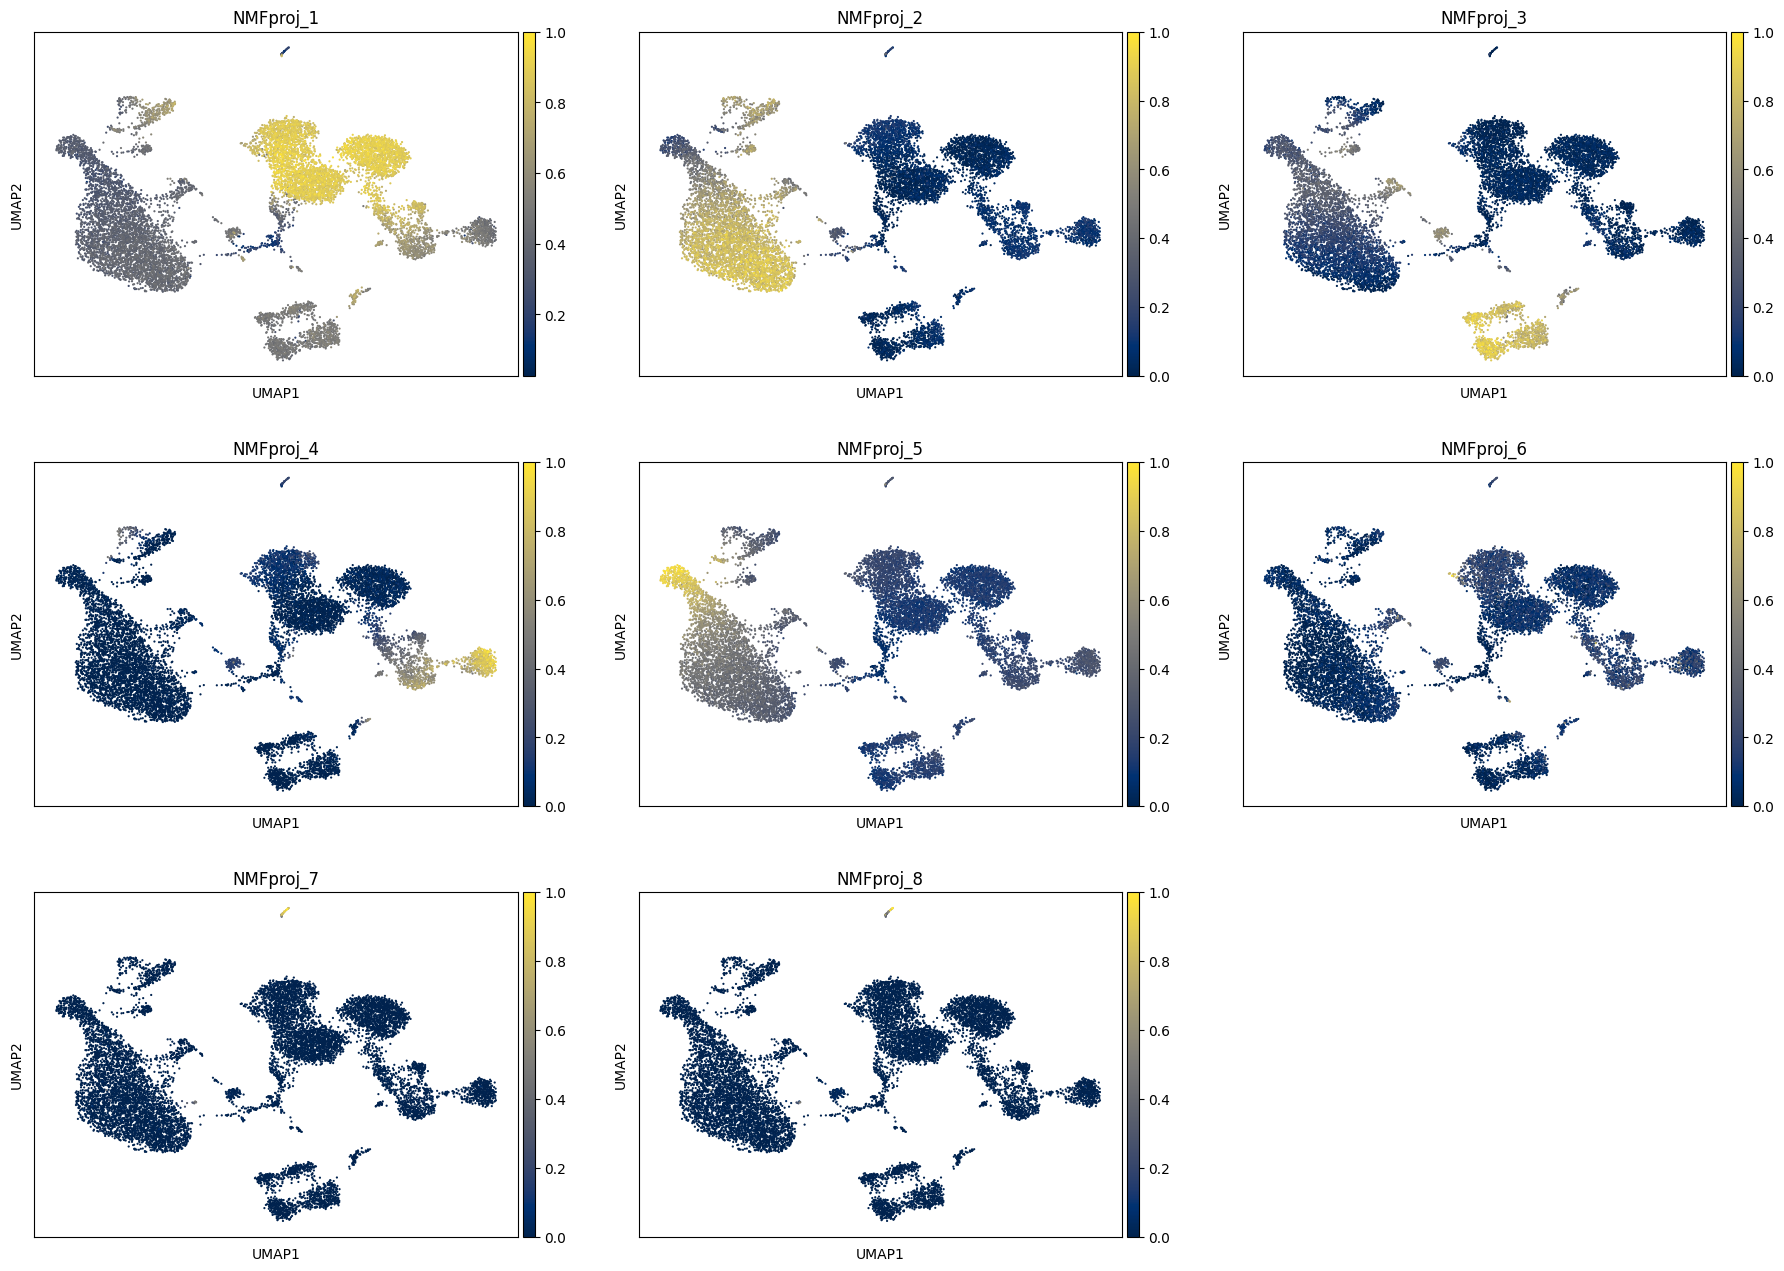

In [23]:
sc.pl.umap(adata_query, color=df_H_norm.columns,
           use_raw=True, ncols=3, vmax=1, cmap='cividis')